### EXTRACTING

In [ ]:
import pandas as pd

IOT = pd.read_csv('/content/RT_IOT2022')
IOT.rename(columns={'Unnamed: 0': 'no'}, inplace=True)
IOT.head()

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


### Transforming the DATA

So the basics of what now I learned that should be prioritized first is to check the data if there are any errors then clean it.

In [ ]:
#Check the dtypes and their counts

IOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   no                        123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [ ]:
#Check if there are any duplicated data

IOT.duplicated().any() #It showed that no data was duplicated

np.False_

In [ ]:
#Check data if there are any "Nan" or Empty data

IOT.isna().sum() #It showed that there are no data that has missing values

,0
no,0
id.orig_p,0
id.resp_p,0
proto,0
service,0
...,...
idle.std,0
fwd_init_window_size,0
bwd_init_window_size,0
fwd_last_window_size,0


# I. The Frequency of every attack type

After cleaning all the data, we are now ready to continue with the given tasks

In [ ]:
# What is the distribution of the Attack_type classes (normal vs. various attacks),and what percentage of the 123,117 instances does each class comprise?

IOT.value_counts('Attack_type') #this showed how exactly is the distribution for each class

,count
Attack_type,
DOS_SYN_Hping,94659
Thing_Speak,8108
ARP_poisioning,7750
MQTT_Publish,4146
NMAP_UDP_SCAN,2590
NMAP_XMAS_TREE_SCAN,2010
NMAP_OS_DETECTION,2000
NMAP_TCP_scan,1002
DDOS_Slowloris,534


In [ ]:
iot = IOT.copy()

In [ ]:
DOS_SYN_Hping = iot.query('Attack_type == "DOS_SYN_Hping"')
Thing_Speak = iot.query('Attack_type == "Thing_Speak"')
ARP_poisioning = iot.query('Attack_type == "ARP_poisioning"')
MQTT_Publish = iot.query('Attack_type == "MQTT_Publish"')
NMAP_UDP_SCAN = iot.query('Attack_type == "NMAP_UDP_SCAN"')
NMAP_XMAS_TREE_SCAN = iot.query('Attack_type == "NMAP_XMAS_TREE_SCAN"')
NMAP_OS_DETECTION = iot.query('Attack_type == "NMAP_OS_DETECTION"')
NMAP_TCP_scan = iot.query('Attack_type == "NMAP_TCP_scan"')
DDOS_Slowloris = iot.query('Attack_type == "DDOS_Slowloris"')
Wipro_bulb = iot.query('Attack_type == "Wipro_bulb"')
Metasploit_Brute_Force_SSH = iot.query('Attack_type == "Metasploit_Brute_Force_SSH"')
NMAP_FIN_SCAN = iot.query('Attack_type == "NMAP_FIN_SCAN"')

In [ ]:
import pandas as pd

# Assuming each attack is a pandas DataFrame and has a 'no' column
attacks = [DOS_SYN_Hping, Thing_Speak, ARP_poisioning, MQTT_Publish, NMAP_UDP_SCAN,
           NMAP_XMAS_TREE_SCAN, NMAP_OS_DETECTION, NMAP_TCP_scan, DDOS_Slowloris,
           Wipro_bulb, Metasploit_Brute_Force_SSH, NMAP_FIN_SCAN]

# Predefined list of attack names
attack_names = ['DOS_SYN_Hping', 'Thing_Speak', 'ARP_poisioning', 'MQTT_Publish',
                'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN', 'NMAP_OS_DETECTION',
                'NMAP_TCP_scan', 'DDOS_Slowloris', 'Wipro_bulb',
                'Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN']

# Dictionary to store percentages with attack names as keys
percentage = {}

total_count = 123117  # Total count of the attack_types

# Iterate over each attack and calculate the percentage
for attack, attack_name in zip(attacks, attack_names): #the zip make the attacks and the attack_names into a tuple
    if 'no' in attack.columns:  #I used there "no" as the indicator of how many counts are the attack_types
        attack_percentage = len(attack['no']) / total_count * 100
        percentage[attack_name] = attack_percentage  # Store the percentage using the attack name

# Convert the percentage dictionary into a pandas DataFrame
percentage_df = pd.DataFrame(list(percentage.items()), columns=['Attack Name', 'Percentage'])

# Display the DataFrame
percentage_df


,Attack Name,Percentage
0,DOS_SYN_Hping,76.885402
1,Thing_Speak,6.585606
2,ARP_poisioning,6.294825
3,MQTT_Publish,3.367528
4,NMAP_UDP_SCAN,2.103690
5,NMAP_XMAS_TREE_SCAN,1.632593
6,NMAP_OS_DETECTION,1.624471
7,NMAP_TCP_scan,0.813860
8,DDOS_Slowloris,0.433734
9,Wipro_bulb,0.205496


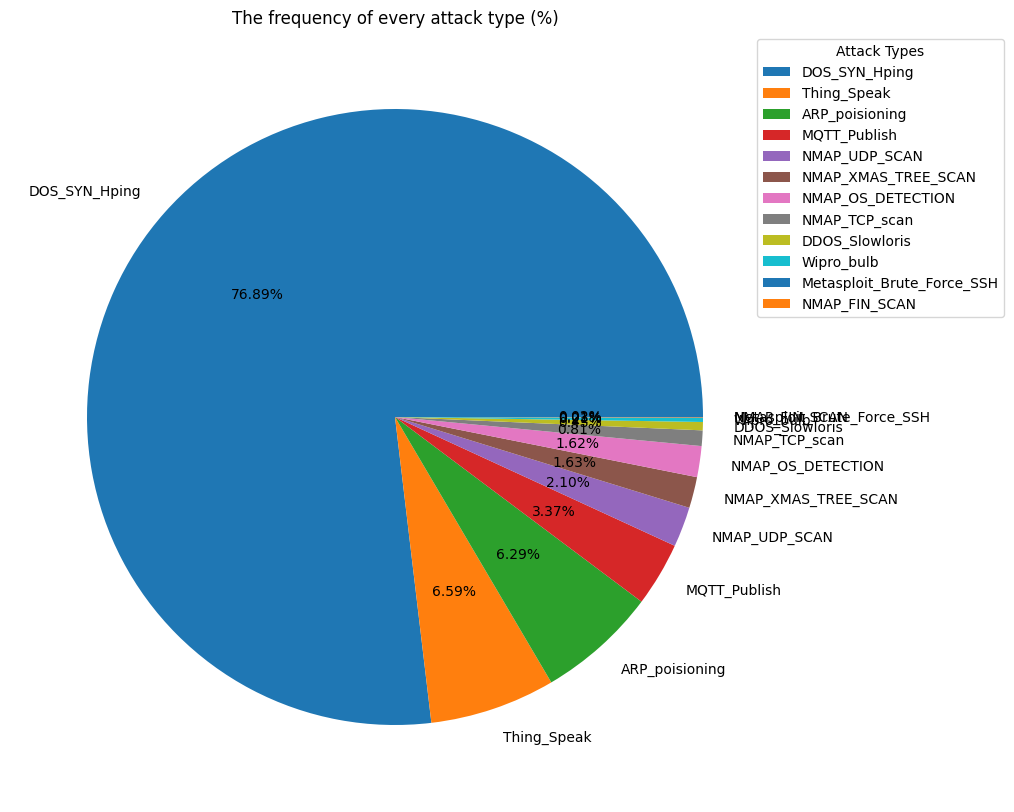

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

Attack_type = percentage_df['Attack Name'].tolist()  # List of attack types
values = percentage_df['Percentage'].tolist()  # List of percentage values

# Create the figure for the pie chart
fig = plt.figure(figsize=(16, 10))

# Plot the pie chart
plt.pie(values, labels=Attack_type, autopct='%.2f%%', labeldistance=1.1,
        textprops={'fontsize': 10})

# Add a legend
plt.legend(Attack_type, title="Attack Types", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title('The frequency of every attack type (%)')
# Show the plot
plt.show()

# II. Analyzing protocol (proto) and service usage across different Attack_type

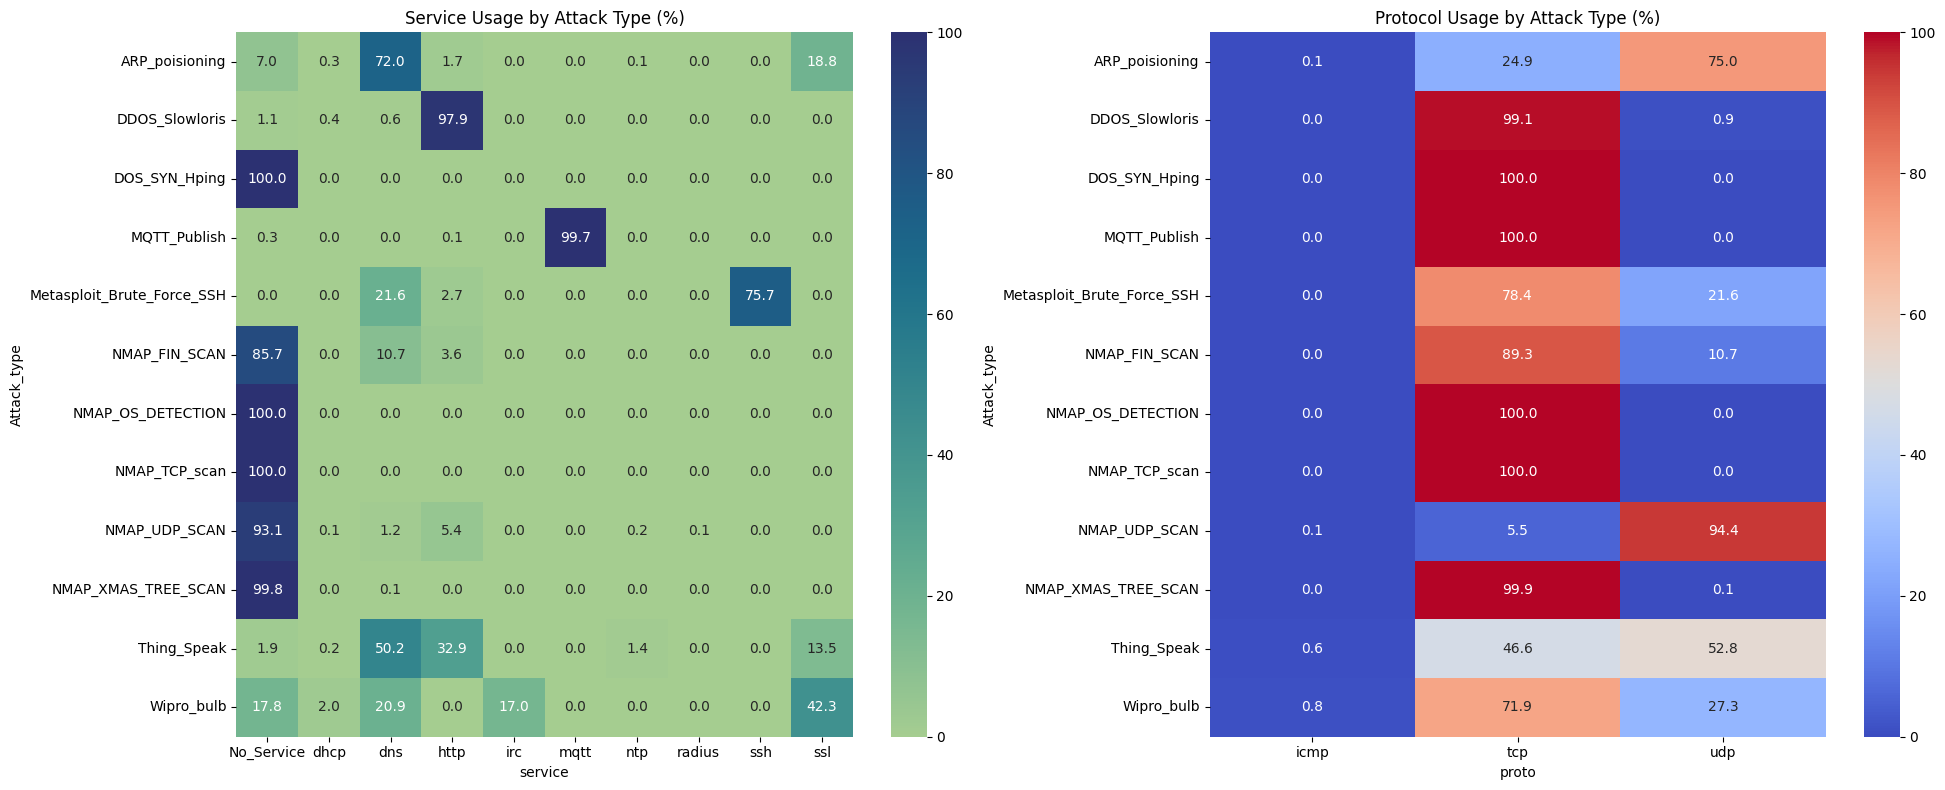

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# service crosstab
service = pd.crosstab(iot['Attack_type'], iot['service'], normalize='index') * 100
serviceclean = service.copy()
serviceclean.rename(columns={'-': 'No_Service'}, inplace=True)

# protocol crosstab
proto = pd.crosstab(iot['Attack_type'], iot['proto'], normalize='index') * 100

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

# Plot service heatmap
sns.heatmap(serviceclean, annot=True, cmap="crest", fmt=".1f", ax=axes[0])
axes[0].set_title("Service Usage by Attack Type (%)")

# Plot protocol heatmap
sns.heatmap(proto, annot=True, fmt=".1f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Protocol Usage by Attack Type (%)")
#display the plot
plt.tight_layout()
plt.show()


# III. Analyzing the flow_duration by calculating the mean and standard deviation for each attack type

In [ ]:
import numpy as np


flow_stats = iot.groupby('Attack_type')['flow_duration'].agg(['mean', 'std']).reset_index()
flow_stats = flow_stats.round({'mean': 2, 'std': 2})
flow_stats = flow_stats.sort_values(by=['mean','std'], ascending=False)

flow_stats

,Attack_type,mean,std
11,Wipro_bulb,586.85,2738.89
3,MQTT_Publish,43.40,24.34
0,ARP_poisioning,15.89,108.26
1,DDOS_Slowloris,14.70,14.12
4,Metasploit_Brute_Force_SSH,3.01,5.21
10,Thing_Speak,0.93,5.25
8,NMAP_UDP_SCAN,0.74,24.91
5,NMAP_FIN_SCAN,0.02,0.11
9,NMAP_XMAS_TREE_SCAN,0.00,0.05
2,DOS_SYN_Hping,0.00,0.00


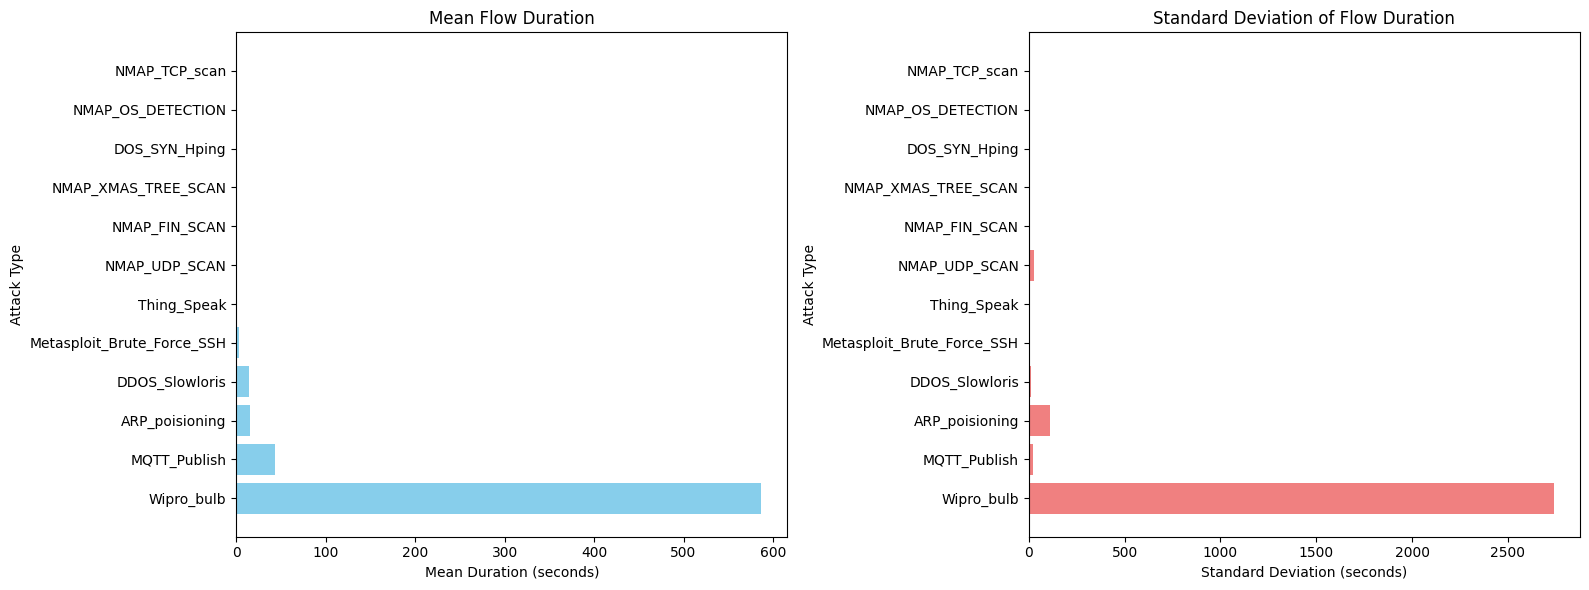

In [ ]:
import matplotlib.pyplot as plt

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Mean Flow Duration
axes[0].barh(flow_stats['Attack_type'], flow_stats['mean'], color='skyblue')
axes[0].set_title('Mean Flow Duration')
axes[0].set_xlabel('Mean Duration (seconds)')
axes[0].set_ylabel('Attack Type')

# Plotting Standard Deviation of Flow Duration
axes[1].barh(flow_stats['Attack_type'], flow_stats['std'], color='lightcoral')
axes[1].set_title('Standard Deviation of Flow Duration')
axes[1].set_xlabel('Standard Deviation (seconds)')
axes[1].set_ylabel('Attack Type')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()
